<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/VGG19_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Mounted at /content/gdrive


In [2]:

import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from keras.applications import VGG19

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:

def convert_1(arr):
  arr=np.where(arr==1,0,arr)
  arr=np.where(arr==2,1,arr)
  arr=np.where(arr==3,2,arr)
  return arr
def get_trn_tst(tst_fold):
  idx=np.asarray(f['fold'])
  y=convert_1(np.asarray(f['label']))
  img=np.asarray(f['image'])
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],224,224,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],224,224,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())

def change(model,c):
  for i in model.layers:
    if ('conv'+str(c) in i.name) :
      i.trainable=True
  return model

f = np.load('/content/gdrive/My Drive/check.npy',allow_pickle=True)
f=f.item()
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

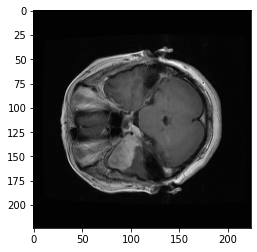

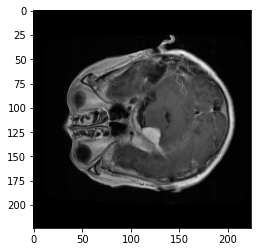

Epoch 1/50
2522/2522 [==============================] - 29s 12ms/step - loss: 0.8667 - accuracy: 0.5908
Epoch 2/50
2522/2522 [==============================] - 29s 12ms/step - loss: 0.6533 - accuracy: 0.7284
Epoch 3/50
2522/2522 [==============================] - 29s 12ms/step - loss: 0.5676 - accuracy: 0.7688
Epoch 4/50
2522/2522 [==============================] - 29s 12ms/step - loss: 0.5378 - accuracy: 0.7768
Epoch 5/50
2522/2522 [==============================] - 29s 12ms/step - loss: 0.5091 - accuracy: 0.7855
Epoch 6/50
2522/2522 [==============================] - 29s 12ms/step - loss: 0.4918 - accuracy: 0.8006
Epoch 7/50
2522/2522 [==============================] - 29s 12ms/step - loss: 0.4811 - accuracy: 0.8117
Epoch 8/50
2522/2522 [==============================] - 29s 12ms/step - loss: 0.4717 - accuracy: 0.8148
Epoch 9/50
2522/2522 [==============================] - 29s 12ms/step - loss: 0.4639 - accuracy: 0.8188
Epoch 10/50
2522/2522 [==============================] - 29s 12m

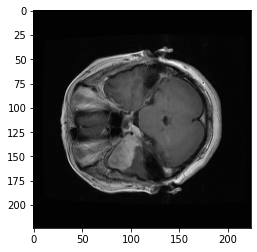

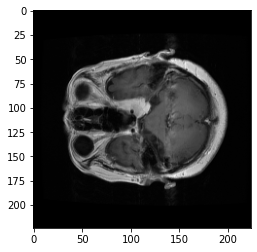

Epoch 1/50
2385/2385 [==============================] - 29s 12ms/step - loss: 0.8607 - accuracy: 0.6252
Epoch 2/50
2385/2385 [==============================] - 27s 11ms/step - loss: 0.6327 - accuracy: 0.7488
Epoch 3/50
2385/2385 [==============================] - 27s 11ms/step - loss: 0.5587 - accuracy: 0.7774
Epoch 4/50
2385/2385 [==============================] - 27s 11ms/step - loss: 0.5233 - accuracy: 0.7996
Epoch 5/50
2385/2385 [==============================] - 27s 11ms/step - loss: 0.5110 - accuracy: 0.8029
Epoch 6/50
2385/2385 [==============================] - 27s 11ms/step - loss: 0.4813 - accuracy: 0.8168
Epoch 7/50
2385/2385 [==============================] - 27s 11ms/step - loss: 0.4652 - accuracy: 0.8210
Epoch 8/50
2385/2385 [==============================] - 27s 11ms/step - loss: 0.4549 - accuracy: 0.8222
Epoch 9/50
2385/2385 [==============================] - 27s 11ms/step - loss: 0.4492 - accuracy: 0.8331
Epoch 10/50
2385/2385 [==============================] - 27s 11m

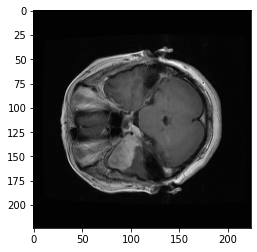

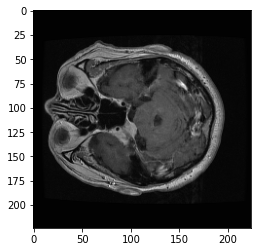

Epoch 1/50
2492/2492 [==============================] - 31s 13ms/step - loss: 0.8691 - accuracy: 0.6216
Epoch 2/50
2492/2492 [==============================] - 28s 11ms/step - loss: 0.6348 - accuracy: 0.7440
Epoch 3/50
2492/2492 [==============================] - 28s 11ms/step - loss: 0.5833 - accuracy: 0.7669
Epoch 4/50
2492/2492 [==============================] - 28s 11ms/step - loss: 0.5324 - accuracy: 0.7881
Epoch 5/50
2492/2492 [==============================] - 28s 11ms/step - loss: 0.5028 - accuracy: 0.8022
Epoch 6/50
2492/2492 [==============================] - 28s 11ms/step - loss: 0.4889 - accuracy: 0.8110
Epoch 7/50
2492/2492 [==============================] - 28s 11ms/step - loss: 0.4835 - accuracy: 0.8086
Epoch 8/50
2492/2492 [==============================] - 28s 11ms/step - loss: 0.4682 - accuracy: 0.8226
Epoch 9/50
2492/2492 [==============================] - 28s 11ms/step - loss: 0.4638 - accuracy: 0.8182
Epoch 10/50
2492/2492 [==============================] - 28s 11m

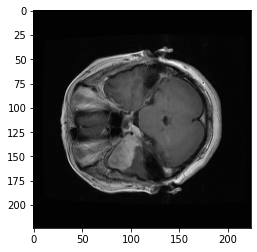

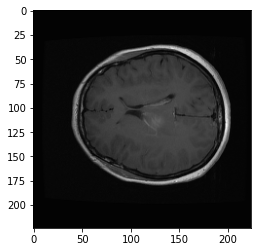

Epoch 1/50
2436/2436 [==============================] - 29s 12ms/step - loss: 0.8289 - accuracy: 0.6199
Epoch 2/50
2436/2436 [==============================] - 28s 11ms/step - loss: 0.6516 - accuracy: 0.7221
Epoch 3/50
2436/2436 [==============================] - 28s 11ms/step - loss: 0.5801 - accuracy: 0.7759
Epoch 4/50
2436/2436 [==============================] - 28s 11ms/step - loss: 0.5404 - accuracy: 0.7845
Epoch 5/50
2436/2436 [==============================] - 28s 11ms/step - loss: 0.5319 - accuracy: 0.7808
Epoch 6/50
2436/2436 [==============================] - 28s 11ms/step - loss: 0.5065 - accuracy: 0.7972
Epoch 7/50
2436/2436 [==============================] - 28s 11ms/step - loss: 0.4932 - accuracy: 0.8095
Epoch 8/50
2436/2436 [==============================] - 28s 11ms/step - loss: 0.4868 - accuracy: 0.8079
Epoch 9/50
2436/2436 [==============================] - 28s 11ms/step - loss: 0.4774 - accuracy: 0.8165
Epoch 10/50
2436/2436 [==============================] - 28s 11m

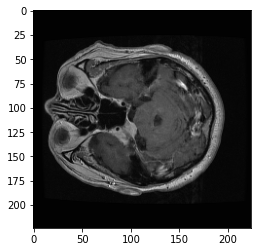

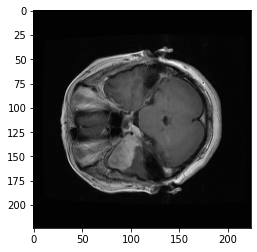

Epoch 1/50
2421/2421 [==============================] - 30s 13ms/step - loss: 0.9092 - accuracy: 0.6171
Epoch 2/50
2421/2421 [==============================] - 28s 12ms/step - loss: 0.6350 - accuracy: 0.7427
Epoch 3/50
2421/2421 [==============================] - 28s 12ms/step - loss: 0.5654 - accuracy: 0.7774
Epoch 4/50
2421/2421 [==============================] - 28s 12ms/step - loss: 0.5210 - accuracy: 0.7902
Epoch 5/50
2421/2421 [==============================] - 28s 12ms/step - loss: 0.4975 - accuracy: 0.7898
Epoch 6/50
2421/2421 [==============================] - 28s 12ms/step - loss: 0.4788 - accuracy: 0.8154
Epoch 7/50
2421/2421 [==============================] - 28s 12ms/step - loss: 0.4575 - accuracy: 0.8211
Epoch 8/50
2421/2421 [==============================] - 28s 12ms/step - loss: 0.4516 - accuracy: 0.8261
Epoch 9/50
2421/2421 [==============================] - 28s 12ms/step - loss: 0.4427 - accuracy: 0.8315
Epoch 10/50
2421/2421 [==============================] - 28s 12m

In [10]:
preds=[]
answers=[]
final_result=[]
history=[]
for index in range(1,6):
  K.clear_session()
  ep=50
  gc.collect()
  trn,tst=get_trn_tst(index)
  plt.imshow(trn[0][0])
  plt.show()
  plt.imshow(tst[0][0])
  plt.show()
  trn_x,trn_y=unison_shuffled_copies(trn[0],trn[1])
  tst_x,tst_y=unison_shuffled_copies(tst[0],tst[1])
  del([trn,tst])
  gc.collect()
  



  mod=VGG19(include_top=True, weights='imagenet')
  out_1=mod.layers[-2].output
  out=Dense(3,activation='softmax')(out_1)
  model=Model(inputs=mod.input,outputs=out)
  
    
    
  esr=EarlyStopping(patience=10,min_delta=0.1,restore_best_weights=True,monitor='val_loss')
  for i in range(len(model.layers)):
    model.layers[i].trainable = False
  model.layers[-1].trainable=True
  model.compile(optimizer=Adam(1e-4), 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
  lrs=LearningRateScheduler(cng)
  hist=model.fit(trn_x,to_categorical(trn_y),batch_size=32,epochs=ep,callbacks=[lrs])

  del([trn_x,trn_y])
  gc.collect()
  pre=model.predict(tst_x)
  preds.append(pre)
  answers.append(tst_y)
  final_result.append(accuracy_score(tst_y,np.argmax(pre,1)))
  gc.collect()


In [11]:
np.mean(final_result)


0.8191153966510697

In [13]:

from sklearn.metrics import confusion_matrix
for i in range(5):
  cnf=confusion_matrix(answers[i],np.argmax(preds[i],1))
  print()
  print(cnf)


[[ 81  31   0]
 [ 16 227   2]
 [ 13  14 158]]

[[ 83  59  25]
 [ 45 278  15]
 [  1   7 166]]

[[ 77  59   3]
 [ 29 193   9]
 [  1   8 193]]

[[ 86  29   9]
 [ 20 292  13]
 [  5   4 170]]

[[ 61  74  31]
 [ 23 257   7]
 [  3   5 182]]
